# P2 Investigate a Dataset: It's time for Baseball Analysis!! (in honor of Vin Scully)

A trip to the ballpark can be one of the most relaxing, boring, tense, anxious, and exciting things in the world. Sitting in the stands, watching each team attempt to put the ball in play, run around the bases, and throw out the runners, baseball can seem like such a simple sport. Yet, contrary to popular belief, baseball is fantastically complex. At any time during the game, there are plenty of opportunities for each side to play games within the game, micro-games if you will. Whether it's between the managers rotating players through the roster, managers trying to coerce the umpires into favorable calls, fielders looking to throw out the runners, runners trying to steal a base on the pitchers, and the core - the pitcher trying to strike out the batter and the batter trying to put the ball in play - there are thousands of small games whose sum leads to one team getting the most runs at the end of nine innings. Next time you watch a game, look at who's watching who, and you'll see the complexity at play.

With so many games, its no wonder that baseball has become so conducive to data. It most certainly helps that Henry Chadwick invented the box score in 1859, not long after the New York Knickerbockers recorded the first game of modern baseball in 1845, recording runs and walks among other things. Chadwick, clearly an early proponent of the game, also invented recording strike outs as "K"s, being the last letter in "struck" out. Chadwick was also the first to compare batters and pitchers by recording their batting average and ERA (earned run average), respectively. While measures of performance have changed since the 1800's (notably the batting average formula adding walks to the formula), statisticians, or [sabermetricians](https://en.wikipedia.org/wiki/Sabermetrics) as they call themselves, are still compiling and comparing these stats. So, as a starting question, let's explore some pitching vs batting stats, and see if we can't find any relationships.

## Pitching vs Batting: Can a pitcher's performance tell us anything about batting stats?

### Exploring and Cleaning the Data:

Before we start asking direct questions, let's explore the datasets in question. First, imports...

In [1]:
import numpy as np
import pandas as pd

Next, we import the relevant CSV files into Pandas Dataframes...

In [2]:
path = './data/'
batting = pd.read_csv(path + 'Batting.csv')
pitching = pd.read_csv(path + 'Pitching.csv')

Next, let's take a look at some features of the datasets, just to get an idea for how they're put together, starting with the length and info of Batting...

In [3]:
print "Entries in Batting: %s \n" % len(batting)
batting.info()

Entries in Batting: 101332 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB


Pitching Info...

In [4]:
print "Entries in Pitching:", len(pitching)
print ""
pitching.info()

Entries in Pitching: 44139

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
playerID    44139 non-null object
yearID      44139 non-null int64
stint       44139 non-null int64
teamID      44139 non-null object
lgID        44008 non-null object
W           44139 non-null int64
L           44139 non-null int64
G           44139 non-null int64
GS          44139 non-null int64
CG          44139 non-null int64
SHO         44139 non-null int64
SV          44139 non-null int64
IPouts      44138 non-null float64
H           44139 non-null int64
ER          44139 non-null int64
HR          44139 non-null int64
BB          44139 non-null int64
SO          44139 non-null int64
BAOpp       42614 non-null float64
ERA         44049 non-null float64
IBB         29564 non-null float64
WP          44006 non-null float64
HBP         43580 non-null float64
BK          44139 non-null int64
BFP         43900 non-null float64
GF          44006 non

So clearly there are some cases where the number of entries for some of the fields is less than the total count of entries. So let's go ahead and look at the heads and tails of each, just in case there are any glaring issues...

In [5]:
print batting.head()
print batting.tail()

    playerID  yearID  stint teamID lgID   G     AB     R     H    2B  ...   \
0  abercda01    1871      1    TRO  NaN   1    4.0   0.0   0.0   0.0  ...    
1   addybo01    1871      1    RC1  NaN  25  118.0  30.0  32.0   6.0  ...    
2  allisar01    1871      1    CL1  NaN  29  137.0  28.0  40.0   4.0  ...    
3  allisdo01    1871      1    WS3  NaN  27  133.0  28.0  44.0  10.0  ...    
4  ansonca01    1871      1    RC1  NaN  25  120.0  29.0  39.0  11.0  ...    

    RBI   SB   CS   BB   SO  IBB  HBP  SH  SF  GIDP  
0   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN   NaN  
1  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN   NaN  
2  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN   NaN  
3  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN   NaN  
4  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]
         playerID  yearID  stint teamID lgID    G     AB     R     H    2B  \
101327   zitoba01    2015      1    OAK   AL    3    0.0   0.0   0.0   0.0   
101328  zobribe01    2015   

In [6]:
print pitching.head()
print pitching.tail()

    playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...   IBB  WP  \
0  bechtge01    1871      1    PH1  NaN   1   2   3   3   2  ...   NaN NaN   
1  brainas01    1871      1    WS3  NaN  12  15  30  30  30  ...   NaN NaN   
2  fergubo01    1871      1    NY2  NaN   0   0   1   0   0  ...   NaN NaN   
3  fishech01    1871      1    RC1  NaN   4  16  24  24  22  ...   NaN NaN   
4  fleetfr01    1871      1    NY2  NaN   0   1   1   1   1  ...   NaN NaN   

   HBP  BK  BFP  GF    R  SH  SF  GIDP  
0  NaN   0  NaN NaN   42 NaN NaN   NaN  
1  NaN   0  NaN NaN  292 NaN NaN   NaN  
2  NaN   0  NaN NaN    9 NaN NaN   NaN  
3  NaN   0  NaN NaN  257 NaN NaN   NaN  
4  NaN   0  NaN NaN   21 NaN NaN   NaN  

[5 rows x 30 columns]
        playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...   IBB  \
44134  youngch03    2015      1    KCA   AL  11   6  34  18   0  ...   0.0   
44135  zieglbr01    2015      1    ARI   NL   0   3  66   0   0  ...   3.0   
44136  zimmejo02    2015    

So it looks like there are a lot of missing stats at the beginning of the database, which makes sense, since some of those stats were invented and tracked later on in baseball history. So as long as we keep track of those stats, so they don't mess with any analysis we try to do later on, then we should be good to go.

But there's another issue if we're trying to compute season averages is going to be the stints column. The stints column tracks the statistics for a player in a single season with all the teams he played with, if for some reason that player played with different teams - e.g. he was traded mid-season. You can see this in the tail of the batting dataframe with "zobribe01", who has two stints, one with Oakland, and the other with Kansas City. So we're going to have to clean the database so that there is only one entry per player per season, so when we compute the season average over the league, we don't end up with averages that are lower than expected. We'll do this by grouping the dataframes by yearID and then by playerID, and then summing the aggregates.

In [7]:
# Group the dataframes by yearID and playerID, use as_index=False so that we retain
# the yearID and playerID in the new dataFrames
grouped_batting = batting.groupby(['yearID', 'playerID'], as_index=False, sort=False).sum()
grouped_pitching = pitching.groupby(['yearID', 'playerID'], as_index=False, sort=False).sum()

# Check the length and tail of batting, to see the entry for "zobribe01"
print "Grouped Batting Data:", len(grouped_batting)
print grouped_batting.tail()
print ""

# Check the length and tail of pitching
print "Grouped Pitching Data:", len(grouped_pitching)
print grouped_pitching.tail()

Grouped Batting Data: 93898
       yearID   playerID  stint    G     AB     R      H    2B   3B    HR  \
93893    2015  zimmery01      1   95  346.0  43.0   86.0  25.0  1.0  16.0   
93894    2015   zitoba01      1    3    0.0   0.0    0.0   0.0  0.0   0.0   
93895    2015  zobribe01      3  126  467.0  76.0  129.0  36.0  3.0  13.0   
93896    2015  zuninmi01      1  112  350.0  28.0   61.0  11.0  0.0  11.0   
93897    2015   zychto01      1   13    0.0   0.0    0.0   0.0  0.0   0.0   

        RBI   SB   CS    BB     SO  IBB  HBP   SH    SF  GIDP  
93893  73.0  1.0  0.0  33.0   79.0  0.0  1.0  0.0  10.0  13.0  
93894   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  
93895  56.0  3.0  4.0  62.0   56.0  3.0  1.0  0.0   5.0   8.0  
93896  28.0  0.0  1.0  21.0  132.0  0.0  5.0  8.0   2.0   6.0  
93897   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  

Grouped Pitching Data: 40859
       yearID   playerID  stint   W   L   G  GS  CG  SHO  SV  ...   IBB   WP  \
40854    2015  

By doing that we went from 101,332 entries in the original batting dataframe to 93,898, and from 44,139 to 40,859 for the pitching dataframe. I'm going to print out the info for each too...

In [8]:
print grouped_batting.info()
print ""
print grouped_pitching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93898 entries, 0 to 93897
Data columns (total 20 columns):
yearID      93898 non-null int64
playerID    93898 non-null object
stint       93898 non-null int64
G           93898 non-null int64
AB          89342 non-null float64
R           89342 non-null float64
H           89342 non-null float64
2B          89342 non-null float64
3B          89342 non-null float64
HR          89342 non-null float64
RBI         89041 non-null float64
SB          88166 non-null float64
CS          67757 non-null float64
BB          89342 non-null float64
SO          82245 non-null float64
IBB         55381 non-null float64
HBP         86828 non-null float64
SH          83612 non-null float64
SF          55873 non-null float64
GIDP        65081 non-null float64
dtypes: float64(16), int64(3), object(1)
memory usage: 15.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40859 entries, 0 to 40858
Data columns (total 28 columns):
yearID      40859 n

The pitching data looks ok, but I there might be an issue with batting. I would expect the yearID, playerID, stint, and G columns to have the same number of entries as at least the AB, R, H, 2B, 3B, HR, and BB columns. I'm going to pull up some of the entries with missing data to see what's going on...

In [9]:
grouped_batting[grouped_batting['AB'].isnull()]

,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
47159,1973,abbotgl01,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47164,1973,alburvi01,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47165,1973,alexado01,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47170,1973,allenll01,3,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47195,1973,baldwda01,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47197,1973,baneed01,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47199,1973,barbest01,1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47207,1973,beenefr01,1,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47210,1973,bellje01,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47225,1973,blylebe01,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have a feeling that these entries represent pitchers who appeared in games but didn't have at bats. I'm going to look at the appearances dataset to find out more...

In [10]:
# Save the previous query as a new dataframe
missing_batting = grouped_batting[grouped_batting['AB'].isnull()]

# Import appearances csv
appearances = pd.read_csv(path + 'Appearances.csv')
print appearances.head()
print appearances.info()

   yearID teamID lgID   playerID  G_all  GS  G_batting  G_defense  G_p  G_c  \
0    1871    BS1  NaN  barnero01   31.0 NaN         31       31.0    0    0   
1    1871    BS1  NaN  barrofr01   18.0 NaN         18       18.0    0    0   
2    1871    BS1  NaN  birdsda01   29.0 NaN         29       29.0    0    7   
3    1871    BS1  NaN   conefr01   19.0 NaN         19       19.0    0    0   
4    1871    BS1  NaN  gouldch01   31.0 NaN         31       31.0    0    0   

   ...   G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_of  G_dh  G_ph  G_pr  
0  ...     16     0    15     0     0     0     0   NaN   NaN   NaN  
1  ...      1     0     0    13     0     4    17   NaN   NaN   NaN  
2  ...      0     0     0     0     0    27    27   NaN   NaN   NaN  
3  ...      0     0     0    18     0     1    18   NaN   NaN   NaN  
4  ...      0     0     0     0     0     1     1   NaN   NaN   NaN  

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data

In [11]:
# Check the appearances dataframe for all entries related to 'abbotgl01', who is
# the first entry in our missing data from batting
appearances[appearances['playerID']=='abbotgl01']

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
51455,1973,OAK,AL,abbotgl01,0.0,NaN,0,0.0,5,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
52357,1974,OAK,AL,abbotgl01,19.0,0.0,1,19.0,19,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
53266,1975,OAK,AL,abbotgl01,30.0,0.0,1,30.0,30,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
54176,1976,OAK,AL,abbotgl01,19.0,0.0,0,19.0,19,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
55215,1977,SEA,AL,abbotgl01,36.0,0.0,0,36.0,36,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
56188,1978,SEA,AL,abbotgl01,29.0,0.0,0,29.0,29,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
57144,1979,SEA,AL,abbotgl01,23.0,0.0,0,23.0,23,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
58088,1980,SEA,AL,abbotgl01,31.0,0.0,0,31.0,31,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
59044,1981,SEA,AL,abbotgl01,22.0,0.0,0,22.0,22,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
60519,1983,DET,AL,abbotgl01,7.0,0.0,0,7.0,7,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN


So it looks like 'abbotgl01' is a pitcher in the American League, which uses a designated hitter instead of having the Pitcher bat. The use of the designated hitter was adopted by the American League in 1973, which, conveniently enough, is also the year at the head of the missing batter info. So it is likely that our missing entries represent pitchers who appeared in games but didn't bat, or may have not have their stats for batting recorded for some reason or another. I think we can safely move on.

### First Question: Can the average ERA tell us anything about Home Runs over a season?

To get a feel for using Pandas, Numpy, and plotting, I thought it would be a good idea to explore ERA and home runs. Perhaps we can find a relationship between the two. We'll look at other stats later on.

First, we group the Pitching and Batting dataframes by yearID, then take the mean of the groupby object, and store the ERA and HR into their own variables...

In [12]:
# ERA_mean Series
ERA_mean = grouped_pitching.groupby('yearID').mean()['ERA']

In [13]:
#HR_mean Series
HR_mean = grouped_pitching.groupby('yearID').mean()['HR']

Next we look at the head and tails to check if everything looks ok...

In [14]:
print "ERA_mean Head and Tails:\n"
print ERA_mean.head()
print ERA_mean.tail()
print ERA_mean.size

print "\n\nHR_mean Head and Tails:\n"
print HR_mean.head()
print HR_mean.tail()
print ERA_mean.size

ERA_mean Head and Tails:

yearID
1871    5.991579
1872    5.518500
1873    4.315600
1874    4.899412
1875    4.743810
Name: ERA, dtype: float64
yearID
2011    5.034275
2012    5.753343
2013    5.254027
2014    5.485210
2015    5.372153
Name: ERA, dtype: float64
145


HR_mean Head and Tails:

yearID
1871    2.473684
1872    1.750000
1873    2.040000
1874    2.470588
1875    1.000000
Name: HR, dtype: float64
yearID
2011    6.876133
2012    7.453172
2013    6.864507
2014    6.049133
2015    6.678912
Name: HR, dtype: float64
145


So it looks like the years match up, and there are equal amounts of entries. Let's plot it out!

In [15]:
#import plotting libraries and print the matplotlib inline so we can view the graphs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

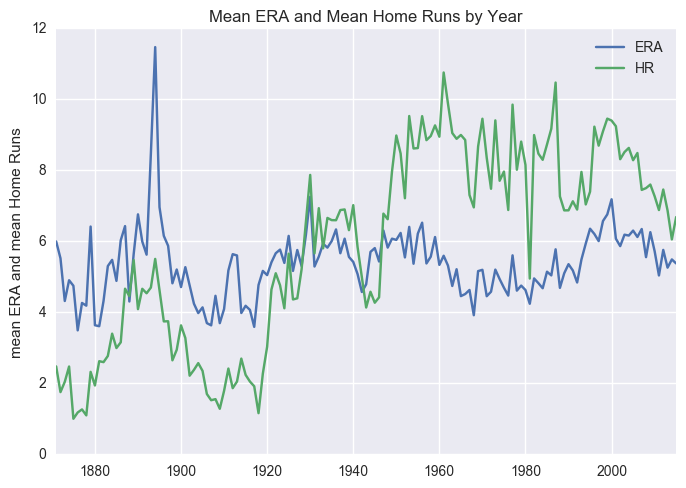

In [35]:
ERA_mean.plot(legend='TRUE')
HR_mean.plot(legend='TRUE')
plt.ylabel("mean ERA and mean Home Runs")
plt.xlabel("Year").set_visible(False)
plt.title("Mean ERA and Mean Home Runs by Year")

Alright! So, tentatively, it looks like there's something there, but let's go ahead and standardize the Series to compare the two more accurately. Also, we're going to probably need to standardize some other datasets further on, so I'm going to write a function to do that for us...

In [17]:
# Function to standardize the dataset
def standardize(dataset):
    mean = dataset.mean()
    sd = dataset.std()
    return (dataset - mean)/sd

And also a function to describe the datasets...

In [18]:
# Function to describe the dataset
def describe_data(dataset):
    print 'Length:', dataset.size
    print 'Head:'
    print dataset.head()
    print 'Tail:'
    print dataset.tail()
    print 'Mean:', dataset.mean()
    print 'Standard Deviation:', dataset.std()

So let's apply these to ERA_mean and HR_mean...

In [19]:
standard_ERA = standardize(ERA_mean)
describe_data(standard_ERA)

Length: 145
Head:
yearID
1871    0.628051
1872    0.149960
1873   -1.065684
1874   -0.475687
1875   -0.632938
Name: ERA, dtype: float64
Tail:
yearID
2011   -0.339395
2012    0.387291
2013   -0.117315
2014    0.116317
2015    0.002062
Name: ERA, dtype: float64
Mean: -2.08262525999e-16
Standard Deviation: 1.0


In [20]:
standard_HR = standardize(HR_mean)
describe_data(standard_HR)

Length: 145
Head:
yearID
1871   -1.251848
1872   -1.519305
1873   -1.412128
1874   -1.252992
1875   -1.796488
Name: HR, dtype: float64
Tail:
yearID
2011    0.375196
2012    0.588457
2013    0.370900
2014    0.069556
2015    0.302308
Name: HR, dtype: float64
Mean: -9.80058945876e-17
Standard Deviation: 1.0


Everything looks good, the mean for both is approximately 0, and the standard deviation is 1, which is what we would expect for a normal dataset. So let's plot...

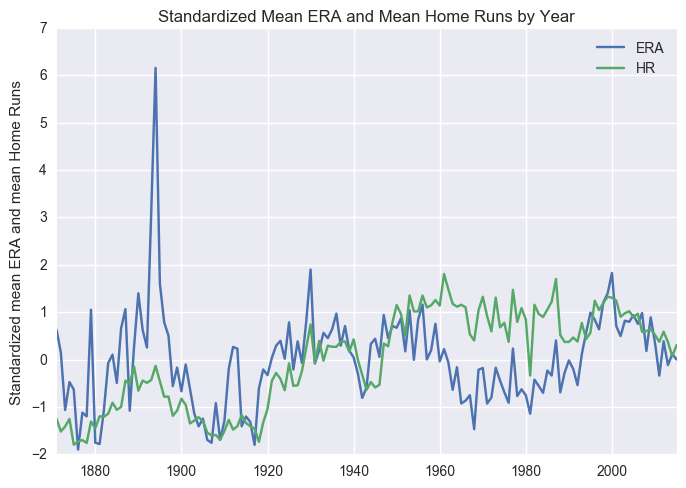

In [34]:
standard_ERA.plot(legend='TRUE')
standard_HR.plot(legend='TRUE')
plt.ylabel("Standardized mean ERA and mean Home Runs")
plt.xlabel("Year").set_visible(False)
plt.title("Standardized Mean ERA and Mean Home Runs by Year")

Interestingly, it looks like the data may be slightly correlated at least for all periods except for roughly 1960 to about 1990 (maybe this is the time when steroids became fashionable, which would explain the diverging line plots, with pitchers and hitters getting better simultaneously). Overall though, it looks like the higher the ERA, the more likely there are more home runs over a season, and vice versa.

In [29]:
# list all available csv files in the Lahman Baseball Database
!ls data/

AllstarFull.csv
Appearances.csv
AwardsManagers.csv
AwardsPlayers.csv
AwardsShareManagers.csv
AwardsSharePlayers.csv
Batting.csv
BattingPost.csv
CollegePlaying.csv
Fielding.csv
FieldingOF.csv
FieldingPost.csv
HallOfFame.csv
HomeGames.csv
Managers.csv
ManagersHalf.csv
Master.csv
Parks.csv
Pitching.csv
PitchingPost.csv
Salaries.csv
Schools.csv
SeriesPost.csv
Teams.csv
TeamsFranchises.csv
TeamsHalf.csv
readme2014.txt
